In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Series de Fourier

In [6]:
def suma_fourier(x,N=2):
    y=0
    for i in range(N):
        a = 1.0/(2.0*i+1)
        y += a * np.sin((2*i+1)*x)
    return y

In [7]:
L = 2.0*np.pi
x = np.linspace(0.0,L,100)

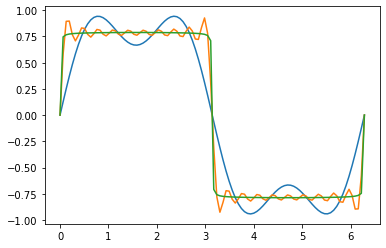

In [8]:
plt.plot(x, suma_fourier(x,N=2))
plt.plot(x, suma_fourier(x,N=10))
plt.plot(x, suma_fourier(x,N=100))

In [9]:
# Transformada de Fourier

In [19]:
T = 1.0
N = 25
delta_t = T/N
t = delta_t * np.arange(N)

f_1 = 2.0
omega_1 = 2.0 * np.pi * f_1
a_1 = 0.3

y = a_1 * np.sin(t * omega_1)

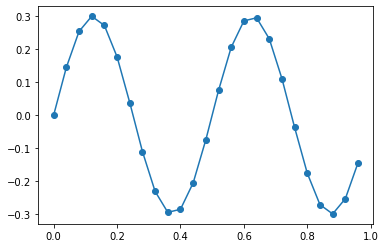

In [20]:
plt.scatter(t, y)
plt.plot(t, y)

In [21]:
Y = np.fft.fft(y)

In [22]:
print(Y)

[ 0.00000000e+00+0.00000000e+00j  1.64714302e-16+6.49683272e-16j
 -8.09439153e-16-3.75000000e+00j -7.64939014e-16-1.73569097e-16j
  5.76980690e-17-1.14874459e-15j  5.54042724e-16+2.34631967e-16j
 -4.34101589e-16-6.25589816e-16j -1.31408109e-16-3.95613702e-16j
  3.33552445e-16+9.92948031e-17j  3.62866657e-16+1.88114942e-16j
 -3.45875907e-16-4.38668255e-16j  2.87793499e-16-4.29611593e-16j
  7.25096077e-16-1.22749802e-16j  7.25096077e-16+1.22749802e-16j
  2.87793499e-16+4.29611593e-16j -3.45875907e-16+4.38668255e-16j
  3.62866657e-16-1.88114942e-16j  3.33552445e-16-9.92948031e-17j
 -1.31408109e-16+3.95613702e-16j -4.34101589e-16+6.25589816e-16j
  5.54042724e-16-2.34631967e-16j  5.76980690e-17+1.14874459e-15j
 -7.64939014e-16+1.73569097e-16j -8.09439153e-16+3.75000000e+00j
  1.64714302e-16-6.49683272e-16j]


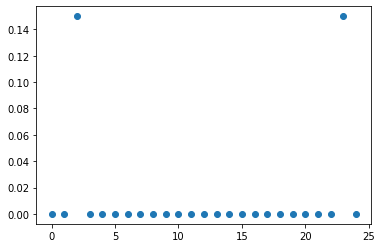

In [24]:
delta_f = 1.0/T

f = delta_f * np.arange(N)

plt.scatter(f, np.abs(Y)/N)

In [25]:
f_1 = 2.0
omega_1 = 2.0*np.pi*f_1
a_1 = 0.3

f_2 = 5.0
omega_2 = 2.0*np.pi*f_2
a_2 = 0.2

y = a_1 * np.sin(t * omega_1) + a_2 * np.sin(t * omega_2)

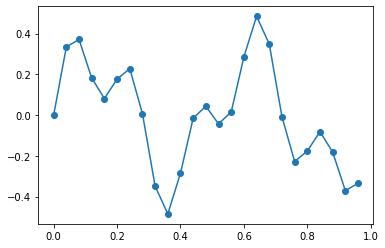

In [27]:
plt.scatter(t, y)
plt.plot(t, y)

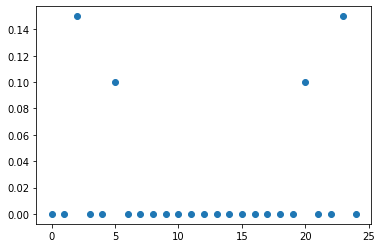

In [28]:
Y = np.fft.fft(y)
plt.scatter(f, np.abs(Y)/N)

In [29]:
f_1 = 2.0
omega_1 = 2.0*np.pi*f_1
a_1 = 0.3

f_2 = 5.0
omega_2 = 2.0*np.pi*f_2
a_2 = 0.2

f_3 = 8.0
omega_3 = 2.0*np.pi*f_3
a_3 = 0.1

y = a_1 * np.sin(t * omega_1) + a_2 * np.sin(t * omega_2) + a_3 * np.sin(t * omega_3) 

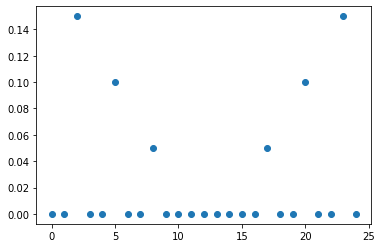

In [30]:
Y = np.fft.fft(y)
plt.scatter(f, np.abs(Y)/N)

In [31]:
# Analisis de datos

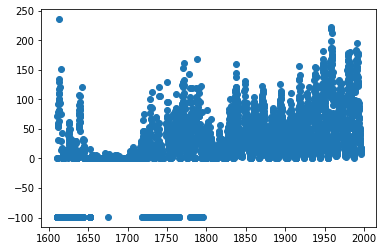

In [33]:
data = np.loadtxt("monthrg.dat")
fecha = data[:,0] + data[:,1]/12.0
manchas = data[:,3]
plt.scatter(fecha, manchas)

In [34]:
ii = fecha>1900
manchas = manchas[ii] - np.mean(manchas[ii])
fecha = fecha[ii]

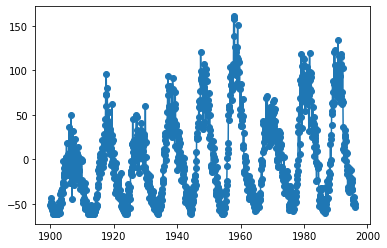

In [46]:
plt.scatter(fecha, manchas)
plt.plot(fecha, manchas)

In [61]:
n_points = len(manchas)
fft_manchas = np.fft.fft(manchas)
frecuencias = np.fft.fftfreq(n_points, 1)
fft_norm = np.abs(fft_manchas)/n_points

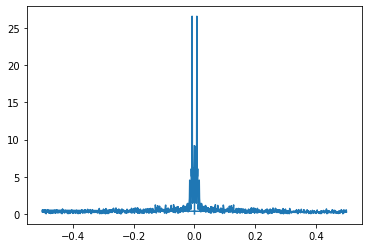

In [62]:
plt.plot(frecuencias, fft_norm)

(-0.02, 0.02)

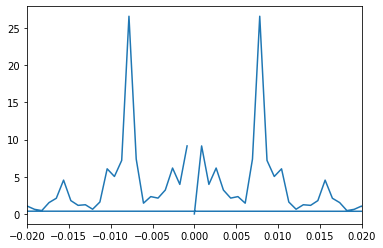

In [63]:
plt.plot(frecuencias, fft_norm)
plt.xlim(-0.02,0.02)

In [64]:
ii = np.argmax(fft_norm)
periodo_meses = 1/frecuencias[ii]
periodo_year = periodo_meses/12.0
print(periodo_year)

10.666666666666666


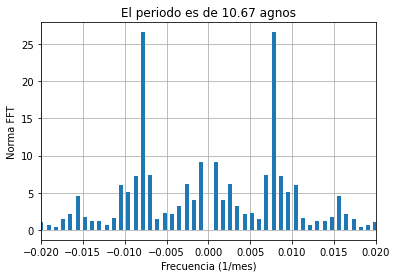

In [65]:
plt.vlines(frecuencias, np.zeros(n_points), fft_norm, linewidth=4)
plt.title("El periodo es de {:.2f} agnos".format(periodo_year))
plt.xlim([-0.02, 0.02])
plt.xlabel('Frecuencia (1/mes)')
plt.ylabel('Norma FFT')
plt.grid()

In [79]:
# tratamiento de senal

jj = fft_norm<5.0
fft_manchas_clean = fft_manchas.copy()
fft_manchas_clean[jj] = 0.0
manchas_clean = np.fft.ifft(fft_manchas_clean)
manchas_clean = np.real(manchas_clean)

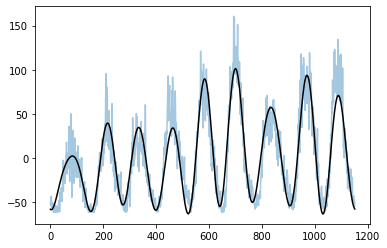

In [84]:
plt.plot(manchas, alpha=0.4)
plt.plot(manchas_clean, color='black')